## Hedonic prices and the demand for clean air

### Introduction:-

#### Here the data used is collected by the study done by "Harrison, D. and Rubinfeld, D.L" in 1980.Here  14 non-constant independent variables, these variables include levels of nitrogen oxides (NOX), particulate concentrations (PART), average number of rooms (RM), proportion of structures built before 1940 (AGE), black population proportion (B), lower status population proportion (LSTAT), crime rate (CRIM), proportion of area zoned with large lots(ZN), proportion of non retail business area (INDUS), property tax rate (TAX),pupil-teacher ratio (PTRATIO), location contiguous to the Charles River (CHAS),weighted distances to the employment centers (DIS), and an index of accessibility(RAD), are related to the  housing data and are used to estimate the demand for clean air. 

#### The dataset contains 506 observations and 14 variables.

### Aim of the study:-
#### Using the housing data to estimate the demand for clean air.

#### Research paper referred:- Gilley, O.W., and R. Kelley Pace, “On the Harrison and Rubinfeld Data,” Journal of Environmental Economics and Management, 31 (1996), 403-405.

#### Academic Press holds the copyright and has granted  permission to Journal of Environmental Economics and Management, 31 (1996)  to distribute this copy.

#### Table 1:- Information about the schema

| variables | Explaination of variables |
| :------ | :------ |
| CRIM    | per capita crime rate by town |
| ZN      | proportion of residential land zoned for lots over 25,000 sq.ft |
| INDUS   | proportion of non-retail business acres per town |
| CHAS    | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) |
| NOX     | nitric oxides concentration (parts per 10 million) |
| RM      | average number of rooms per dwelling | 
| AGE     | proportion of owner-occupied units built prior to 1940 |
| DIS     | weighted distances to five Boston employment centres |
| RAD     | index of accessibility to radial highways |
| TAX     | full value property tax rate per $10,000 |
| PTRATIO | pupil-teacher ratio by town |
| B       | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town |
| LSTAT   | percentage lower status of the population |
| MEDV    | Median value of owner occupied homes |


In [6]:
# importing important libraries

import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [7]:
# Reading the dataset, using delimiter "whitespace"

house=pd.read_csv("housing.csv",delim_whitespace=True,header=None)
house

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [8]:
# Giving names to the variables based on given dataset

house.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

In [9]:
house.head() # using head function to check first 5 rows of dataset,and to match with the given dataset.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [10]:
house.tail() #using tail function to check last 5 rows of dataset,and to match with the given dataset.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


### Q2) Information about the data frame:-

#### a) Dimensions of the dataframe :-

In [13]:
house.shape       #checking shape of data to cross-check number of observations and variables.

(506, 14)

##### This dataset contains 506 observations and 14 variables.

In [15]:
house.info()       # To check the datatypes of each variables.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


#### C) Statistical metrics of each column:-

#### Table 2:-

| variables | description of variables | statistical metrics |
| :------ | :------ | :------ |
| CRIM    | per capita crime rate by town | continuous data|
| ZN      | proportion of residential land zoned for lots over 25,000 sq.ft | continuous data |
| INDUS   | proportion of non-retail business acres per town | continuous data |
| CHAS    | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) | categorical data |
| NOX     | nitric oxides concentration (parts per 10 million) | continuous data |
| RM      | average number of rooms per dwelling | discrete data |
| AGE     | proportion of owner-occupied units built prior to 1940 | discrete data |
| DIS     | weighted distances to five Boston employment centres | continuous data |
| RAD     | index of accessibility to radial highways | discrete data |
| TAX     | full value property tax rate per $10,000 | continuous data |
| PTRATIO | pupil-teacher ratio by town | continuous data |
| B       | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town | continuous data |
| LSTAT   | percentage lower status of the population | continuous data |
| MEDV    | Median value of owner occupied homes  | continuous data |

In [17]:
house=house.astype({"CHAS":"category"})         #changing the datatype statistically.

In [18]:
house.info() # cross-checking, to see whether the desired datatype is changed or not.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    int64   
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(1), float64(12), int64(1)
memory usage: 52.1 KB


In [19]:
house.describe(include="all") # checking the statistical summary points of each variables.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.0,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
unique,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,471.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.613524,11.363636,11.136779,NaN,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,NaN,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,NaN,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,NaN,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,NaN,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,NaN,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000


### Q3) Data pre-processing

### a) checking missing values in each variable:-

In [22]:
houses=house.isnull() #checking missing values in each column, (True= missing value present, False= no missing value)
houses

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [23]:
import missingno as msno     #importing missingno library to visualise missing values in the dataframe.

<AxesSubplot:>

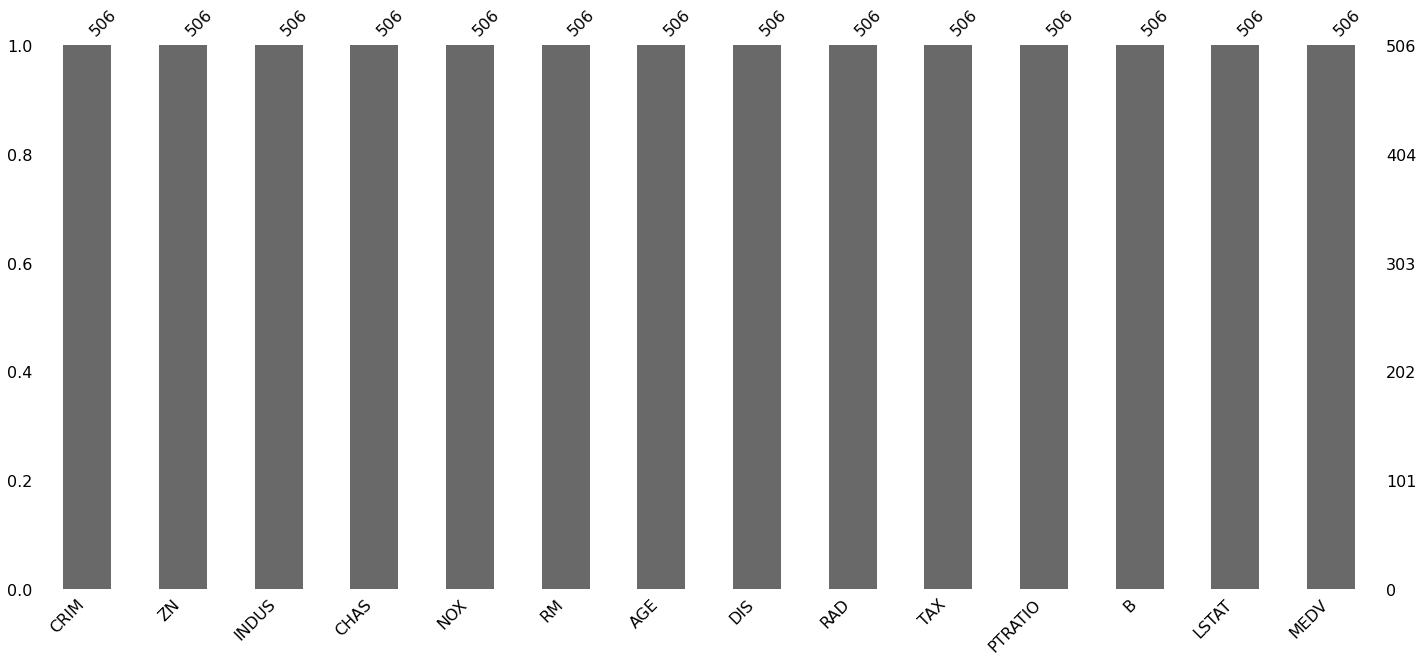

In [24]:
msno.bar(house)   # plotting bar graph to visualise the missing values in the dataframe.

##### Result:- There are no missing values in the given dataset.

### b) Checking Erroneous/wrong values in each variable:-

In [27]:
house.nunique()          #checking TOTAL number of unique values in each variable.

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [28]:
house['ZN'].unique()      # CHECKING UNIQUE VALUES IN COLUMN "ZN"

array([ 18. ,   0. ,  12.5,  75. ,  21. ,  90. ,  85. , 100. ,  25. ,
        17.5,  80. ,  28. ,  45. ,  60. ,  95. ,  82.5,  30. ,  22. ,
        20. ,  40. ,  55. ,  52.5,  70. ,  34. ,  33. ,  35. ])

In [29]:
house['INDUS'].unique()   # CHECKING UNIQUE VALUES IN COLUMN "INDUS"

array([ 2.31,  7.07,  2.18,  7.87,  8.14,  5.96,  2.95,  6.91,  5.64,
        4.  ,  1.22,  0.74,  1.32,  5.13,  1.38,  3.37,  6.07, 10.81,
       12.83,  4.86,  4.49,  3.41, 15.04,  2.89,  8.56, 10.01, 25.65,
       21.89, 19.58,  4.05,  2.46,  3.44,  2.93,  0.46,  1.52,  1.47,
        2.03,  2.68, 10.59, 13.89,  6.2 ,  4.93,  5.86,  3.64,  3.75,
        3.97,  6.96,  6.41,  3.33,  1.21,  2.97,  2.25,  1.76,  5.32,
        4.95, 13.92,  2.24,  6.09,  9.9 ,  7.38,  3.24,  6.06,  5.19,
        1.89,  3.78,  4.39,  4.15,  2.01,  1.25,  1.69,  2.02,  1.91,
       18.1 , 27.74,  9.69, 11.93])

In [30]:
house['NOX'].unique() # CHECKING UNIQUE VALUES IN COLUMN "NOX"

array([0.538 , 0.469 , 0.458 , 0.524 , 0.499 , 0.428 , 0.448 , 0.439 ,
       0.41  , 0.403 , 0.411 , 0.453 , 0.4161, 0.398 , 0.409 , 0.413 ,
       0.437 , 0.426 , 0.449 , 0.489 , 0.464 , 0.445 , 0.52  , 0.547 ,
       0.581 , 0.624 , 0.871 , 0.605 , 0.51  , 0.488 , 0.401 , 0.422 ,
       0.404 , 0.415 , 0.55  , 0.507 , 0.504 , 0.431 , 0.392 , 0.394 ,
       0.647 , 0.575 , 0.447 , 0.4429, 0.4   , 0.389 , 0.385 , 0.405 ,
       0.433 , 0.472 , 0.544 , 0.493 , 0.46  , 0.4379, 0.515 , 0.442 ,
       0.518 , 0.484 , 0.429 , 0.435 , 0.77  , 0.718 , 0.631 , 0.668 ,
       0.671 , 0.7   , 0.693 , 0.659 , 0.597 , 0.679 , 0.614 , 0.584 ,
       0.713 , 0.74  , 0.655 , 0.58  , 0.532 , 0.583 , 0.609 , 0.585 ,
       0.573 ])

In [31]:
house['DIS'].unique() # CHECKING UNIQUE VALUES IN COLUMN "DIS"

array([ 4.09  ,  4.9671,  6.0622,  5.5605,  5.9505,  6.0821,  6.5921,
        6.3467,  6.2267,  5.4509,  4.7075,  4.4619,  4.4986,  4.2579,
        3.7965,  3.7979,  4.0123,  3.9769,  4.0952,  4.3996,  4.4546,
        4.682 ,  4.4534,  4.4547,  4.239 ,  4.233 ,  4.175 ,  3.99  ,
        3.7872,  3.7598,  3.3603,  3.3779,  3.9342,  3.8473,  5.4011,
        5.7209,  5.1004,  5.6894,  5.87  ,  6.0877,  6.8147,  7.3197,
        8.6966,  9.1876,  8.3248,  7.8148,  6.932 ,  7.2254,  6.8185,
        7.2255,  7.9809,  9.2229,  6.6115,  6.498 ,  5.2873,  4.2515,
        4.5026,  4.0522,  4.0905,  5.0141,  5.4007,  4.7794,  4.4377,
        4.4272,  3.7476,  3.4217,  3.4145,  3.0923,  3.0921,  3.6659,
        3.615 ,  3.4952,  2.7778,  2.8561,  2.7147,  2.421 ,  2.1069,
        2.211 ,  2.1224,  2.4329,  2.5451,  2.6775,  2.3534,  2.548 ,
        2.2565,  2.4631,  2.7301,  2.7474,  2.4775,  2.7592,  2.2577,
        2.1974,  2.0869,  1.9444,  2.0063,  1.9929,  1.7572,  1.7883,
        1.8125,  1.9

In [32]:
house['B'].unique() # CHECKING UNIQUE VALUES IN COLUMN "B"

array([3.9690e+02, 3.9283e+02, 3.9463e+02, 3.9412e+02, 3.9560e+02,
       3.8663e+02, 3.8671e+02, 3.9252e+02, 3.9050e+02, 3.8002e+02,
       3.9562e+02, 3.8685e+02, 3.8675e+02, 2.8899e+02, 3.9095e+02,
       3.7657e+02, 3.9253e+02, 3.9454e+02, 3.9433e+02, 3.0342e+02,
       3.7688e+02, 3.0638e+02, 3.8794e+02, 3.8023e+02, 3.6017e+02,
       3.7673e+02, 2.3260e+02, 3.5877e+02, 2.4831e+02, 3.7756e+02,
       3.9343e+02, 3.9563e+02, 3.8541e+02, 3.8337e+02, 3.9446e+02,
       3.8939e+02, 3.9274e+02, 3.9556e+02, 3.9397e+02, 3.9593e+02,
       3.9290e+02, 3.9068e+02, 3.9511e+02, 3.7808e+02, 3.9558e+02,
       3.9324e+02, 3.9621e+02, 3.8373e+02, 3.7694e+02, 3.9091e+02,
       3.7717e+02, 3.9492e+02, 3.8323e+02, 3.7366e+02, 3.8696e+02,
       3.8640e+02, 3.9606e+02, 3.9064e+02, 3.9230e+02, 3.9599e+02,
       3.9515e+02, 3.9218e+02, 3.9355e+02, 3.9501e+02, 3.9633e+02,
       3.5798e+02, 3.9183e+02, 3.9353e+02, 3.9476e+02, 7.0800e+01,
       3.9447e+02, 3.9269e+02, 3.9405e+02, 3.9567e+02, 3.8769e

In [33]:
house['LSTAT'].unique() # CHECKING UNIQUE VALUES IN COLUMN "LSTAT"

array([ 4.98,  9.14,  4.03,  2.94,  5.33,  5.21, 12.43, 19.15, 29.93,
       17.1 , 20.45, 13.27, 15.71,  8.26, 10.26,  8.47,  6.58, 14.67,
       11.69, 11.28, 21.02, 13.83, 18.72, 19.88, 16.3 , 16.51, 14.81,
       17.28, 12.8 , 11.98, 22.6 , 13.04, 27.71, 18.35, 20.34,  9.68,
       11.41,  8.77, 10.13,  4.32,  1.98,  4.84,  5.81,  7.44,  9.55,
       10.21, 14.15, 18.8 , 30.81, 16.2 , 13.45,  9.43,  5.28,  8.43,
       14.8 ,  4.81,  5.77,  3.95,  6.86,  9.22, 13.15, 14.44,  6.73,
        9.5 ,  8.05,  4.67, 10.24,  8.1 , 13.09,  8.79,  6.72,  9.88,
        5.52,  7.54,  6.78,  8.94, 11.97, 10.27, 12.34,  9.1 ,  5.29,
        7.22,  7.51,  9.62,  6.53, 12.86,  8.44,  5.5 ,  5.7 ,  8.81,
        8.2 ,  8.16,  6.21, 10.59,  6.65, 11.34,  4.21,  3.57,  6.19,
        9.42,  7.67, 10.63, 13.44, 12.33, 16.47, 18.66, 14.09, 12.27,
       15.55, 13.  , 10.16, 16.21, 17.09, 10.45, 15.76, 12.04, 10.3 ,
       15.37, 13.61, 14.37, 14.27, 17.93, 25.41, 17.58, 27.26, 17.19,
       15.39, 18.34,

In [34]:
house['MEDV'].unique() #CHECKING UNIQUE VALUES N COLUMN "MEDV"

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 13.6, 19.6, 15.2, 14.5,
       15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 13.2, 13.1, 13.5, 20. ,
       24.7, 30.8, 34.9, 26.6, 25.3, 21.2, 19.3, 14.4, 19.4, 19.7, 20.5,
       25. , 23.4, 35.4, 31.6, 23.3, 18.7, 16. , 22.2, 33. , 23.5, 22. ,
       17.4, 20.9, 24.2, 22.8, 24.1, 21.4, 20.8, 20.3, 28. , 23.9, 24.8,
       22.5, 23.6, 22.6, 20.6, 28.4, 38.7, 43.8, 33.2, 27.5, 26.5, 18.6,
       20.1, 19.5, 19.8, 18.8, 18.5, 18.3, 19.2, 17.3, 15.7, 16.2, 18. ,
       14.3, 23. , 18.1, 17.1, 13.3, 17.8, 14. , 13.4, 11.8, 13.8, 14.6,
       15.4, 21.5, 15.3, 17. , 41.3, 24.3, 27. , 50. , 22.7, 23.8, 22.3,
       19.1, 29.4, 23.2, 24.6, 29.9, 37.2, 39.8, 37.9, 32.5, 26.4, 29.6,
       32. , 29.8, 37. , 30.5, 36.4, 31.1, 29.1, 33.3, 30.3, 34.6, 32.9,
       42.3, 48.5, 24.4, 22.4, 28.1, 23.7, 26.7, 30.1, 44.8, 37.6, 46.7,
       31.5, 31.7, 41.7, 48.3, 29. , 25.1, 17.6, 24

##### Result:- checked erroneous values in each variable, found nothing erroneous.

### c) checking skweness of the dataframe:-

In [37]:
house.drop_duplicates() # dropping duplicate values if any, to avoid bias in checking skeweness.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


##### Result:- there are no duplicate values found, therefore dataframe is ready for further investigation.

In [39]:
house.skew(axis=0)       # checking skewness of each variables.

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_8044/3114858130.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  house.skew(axis=0) # checking skewness of each variables.


CRIM       5.223149
ZN         2.225666
INDUS      0.295022
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
MEDV       1.108098
dtype: float64

### Result:- Represented in the table below
 #### Table 3:-
 
 | variable | skewness value | Type of skewness |
 | :------ | :------ | :------ |
 |CRIM     |5.223149 | highly right skewed |
 |ZN       |2.225666 | highly right skewed |
 |INDUS    | 0.295022| symmetrical |
 |NOX      | 0.729308| moderately right skewed|
 |RM       | 0.403612| symmetrical |
 |AGE      |-0.598963| moderately left skewed |
 |DIS      | 1.011781| moderately right skewed|
 |RAD      | 1.004815| moderately right skewed|
 |TAX      | 0.669956| moderately right skewed|
 |PTRATIO  |-0.802325| moderately left skewed|
 |B        |-2.890374| highly left skewed |
 |LSTAT    | 0.906460| moderately right skewed|
 |MEDV     | 1.108098| highly right skewed |

### d) checking for outliers:-

Text(0.5, 1.0, 'outliers in CRIM')

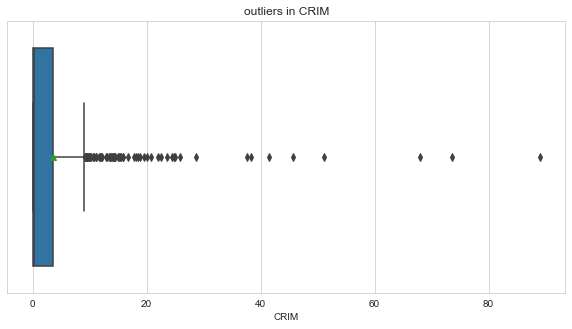

In [41]:
plt.figure(figsize=(10,5))                         # fixing graph size.
sns.set_style("whitegrid")                         # fixing graph background.
sns.boxplot(x='CRIM',data=house,showmeans=True)    # plotting boxplot,using both mean and median.
plt.title('outliers in CRIM')                      # giving title to the graph.


##### Result:- 'CRIM' variable has outliers and is also highly right skewed.

Text(0.5, 1.0, 'outliers in residential land zoned for lots')

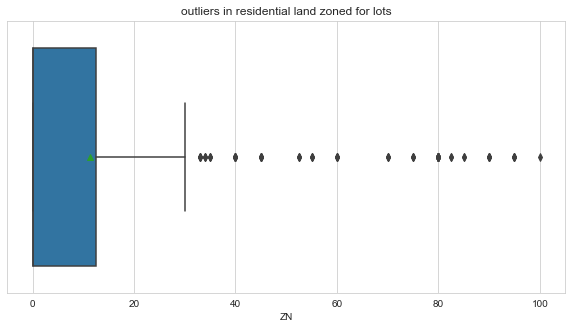

In [43]:
plt.figure(figsize=(10,5))                                   # fixing graph size.
sns.set_style("whitegrid")                                   # fixing graph background.
sns.boxplot(x='ZN',data=house,showmeans=True)                # plotting boxplot,using both mean and median.
plt.title('outliers in residential land zoned for lots')     # giving title to the graph.

##### Result:- 'ZN'variable has outliers and is also highly right skewed.

Text(0.5, 1.0, 'outliers in non-retail business acres per town')

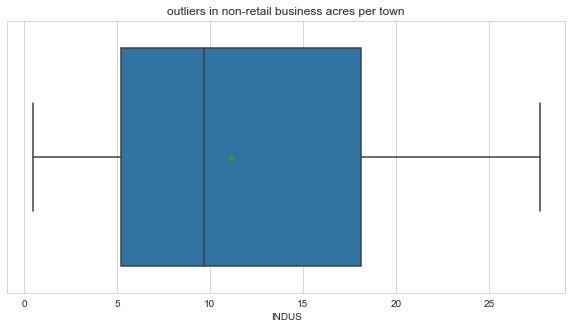

In [45]:
plt.figure(figsize=(10,5))                                  #fixing graph size
sns.set_style("whitegrid")                                  # fixing background of graph.
sns.boxplot(x='INDUS',data=house,showmeans=True)            # plotting boxplot using mean and median.
plt.title('outliers in non-retail business acres per town') # giving title to the graph.

##### Result:- "INDUS" variable has no outlier, but is moderatly right skewed.

Text(0.5, 1.0, 'outliers in nitric oxides concentration')

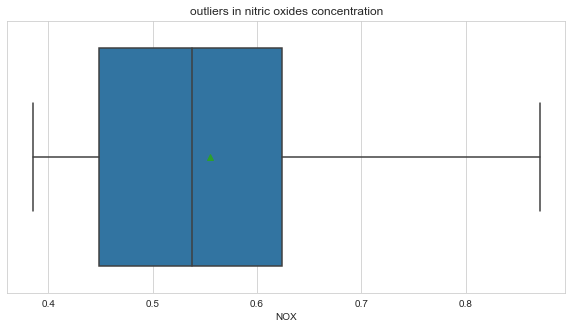

In [48]:
plt.figure(figsize=(10,5))                           #fixing the size of the graph.
sns.set_style("whitegrid")                           # fixing the background of the graph.
sns.boxplot(x='NOX',data=house,showmeans=True)       # plotting boxplot using both mean and median.
plt.title('outliers in nitric oxides concentration') # giving title to the graph.

##### Result:- variable 'NOX' has no outliers, but is right skewed.

Text(0.5, 1.0, 'outliers in average number of rooms per dwelling')

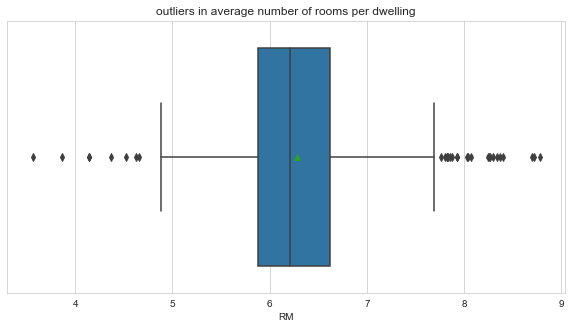

In [50]:
plt.figure(figsize=(10,5))                                    #fixing size of the graph.
sns.set_style("whitegrid")                                    #fixing background of graph.
sns.boxplot(x='RM',data=house,showmeans=True)                 #plotting the boxplot using both  mean and median.
plt.title('outliers in average number of rooms per dwelling') #giving the title to the graph.

##### Result:- variable 'RM' is having outliers on both the side of median line, but looks symmetrically distributed.

Text(0.5, 1.0, 'outliers in owner-occupied units built prior to 1940')

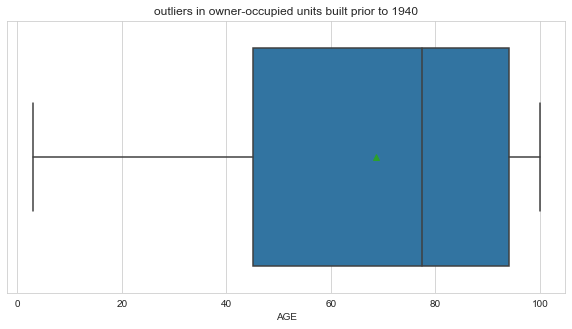

In [52]:
plt.figure(figsize=(10,5))                                        # fixing the size of the graph.
sns.set_style("whitegrid")                                        # fixing the background of the graph.
sns.boxplot(x='AGE',data=house,showmeans=True)                    # plotting the boxplot using both mean and median.
plt.title('outliers in owner-occupied units built prior to 1940') # giving title to the graph.

##### Result:- variable 'AGE' is not having any outliers, but data is moderatly left skewed.

Text(0.5, 1.0, 'outliers in weighted distances to five Boston employment centres')

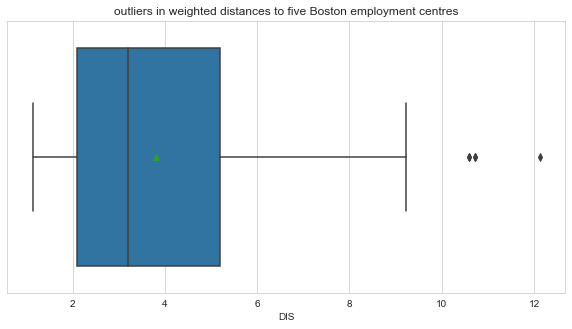

In [54]:
plt.figure(figsize=(10,5))                                                #fixing graph size.
sns.set_style("whitegrid")                                                # fixing graph background.
sns.boxplot(x='DIS',data=house,showmeans=True)                            # plotting boxplot.
plt.title('outliers in weighted distances to five Boston employment centres')# giving title to the graph

##### Result:- variable 'DIS' has 3 outliers, and distribution looks moderately right skewed.

Text(0.5, 1.0, 'outliers in index of accessibility to radial highways')

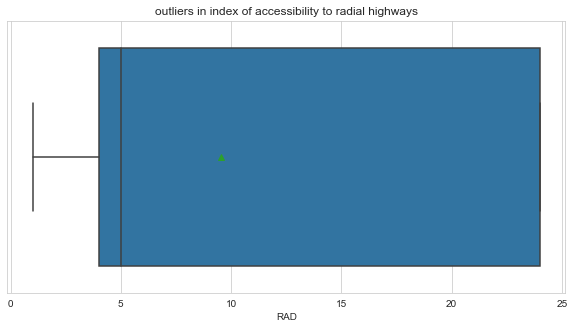

In [56]:
plt.figure(figsize=(10,5))                                         #fixing graph size.
sns.set_style("whitegrid")                                         # fixing graph background.
sns.boxplot(x='RAD',data=house,showmeans=True)                     #plotting boxplot.
plt.title('outliers in index of accessibility to radial highways') #giving title to the graph.

##### Result:- variable 'RAD' has no outliers, but is moderately right skewed.

Text(0.5, 1.0, 'outliers in full-value property-tax rate per $10,000')

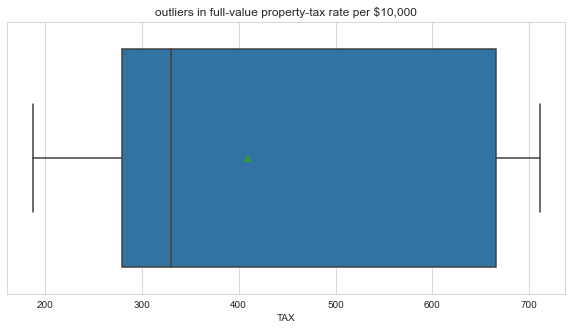

In [58]:
plt.figure(figsize=(10,5))                                         #fixing graph size.
sns.set_style("whitegrid")                                         # fixing background of the graph.
sns.boxplot(x='TAX',data=house,showmeans=True)                     # plotting boxplot.
plt.title('outliers in full-value property-tax rate per $10,000')  # giving suitable title.

##### Result:- variable 'TAX' has no outliers, it is moderately right skewed.

Text(0.5, 1.0, 'outliers in pupil-teacher ratio by town')

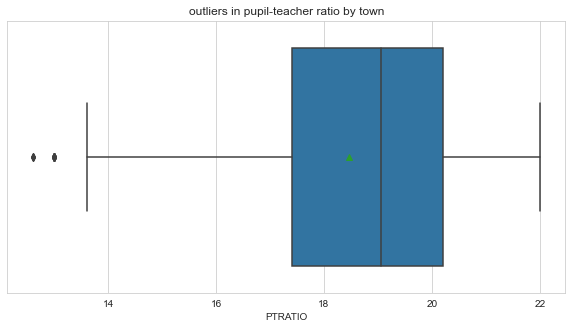

In [60]:
plt.figure(figsize=(10,5))                           #fixing the size of the graph.
sns.set_style("whitegrid")                           # fixing the background of the graph.
sns.boxplot(x='PTRATIO',data=house,showmeans=True)   # plotting the boxplot using mean and median.
plt.title('outliers in pupil-teacher ratio by town') #giving title to the graph.

##### Result:- variable 'PTRATIO' has 2 outliers, and is moderately left skewed.

Text(0.5, 1.0, 'outliers in proportion of blacks by town')

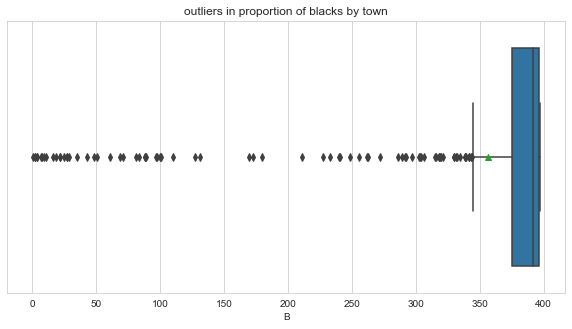

In [62]:
plt.figure(figsize=(10,5))                            # fixing the graph size
sns.set_style("whitegrid")                            # fixing the graph background.
sns.boxplot(x='B',data=house,showmeans=True)          # plotting the boxplot using mean and median.
plt.title('outliers in proportion of blacks by town') # giving title to the graph.

##### Result:- variable 'B' has many outliers, and is highly left skewed.

Text(0.5, 1.0, 'outliers in % lower status of the population')

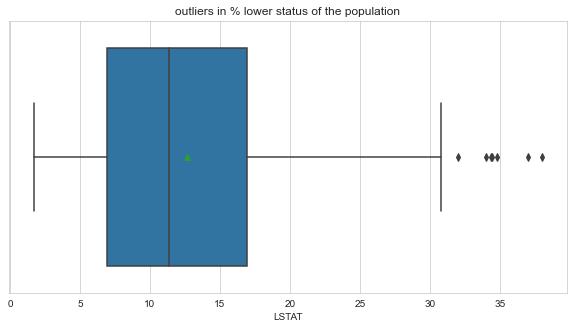

In [64]:
plt.figure(figsize=(10,5))                                # fixing graph size.
sns.set_style("whitegrid")                                # fixing graph background.
sns.boxplot(x='LSTAT',data=house,showmeans=True)          # plotting boxplot.
plt.title('outliers in % lower status of the population') # giving title to the graph.

##### Result:- variable 'LSTAT' has outliers, and is moderatly right skewed.

Text(0.5, 1.0, 'outliers in Median value of owner-occupied homes ')

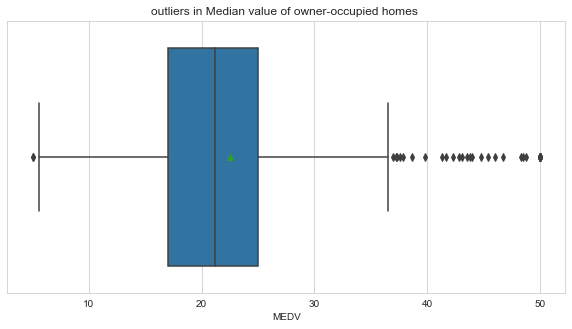

In [66]:
plt.figure(figsize=(10,5))                                    # fixing graph size.
sns.set_style("whitegrid")                                    #fixing graph background.
sns.boxplot(x='MEDV',data=house,showmeans=True)               #plotting boxplot.
plt.title('outliers in Median value of owner-occupied homes ')# giving title to the graph.

##### Result:- variable 'MEDV' hasmany outliers, and is highly right skewed.

### a) Distribution of numerical variables.

In [70]:
numeric=['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'] #listng all numerical columns together.

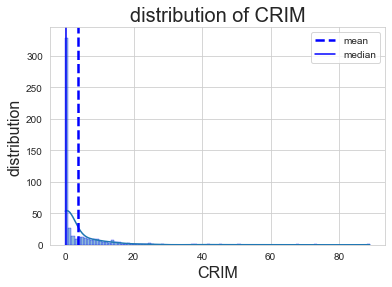

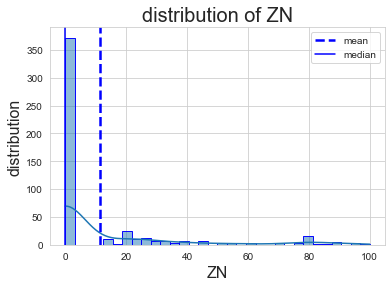

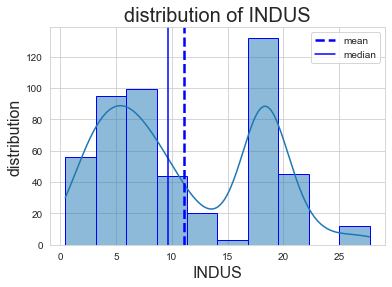

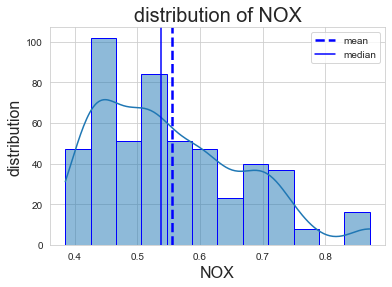

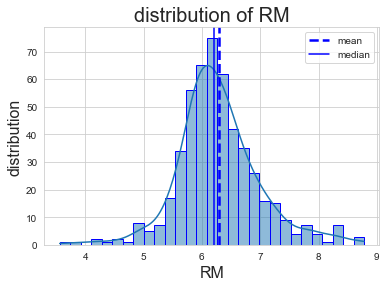

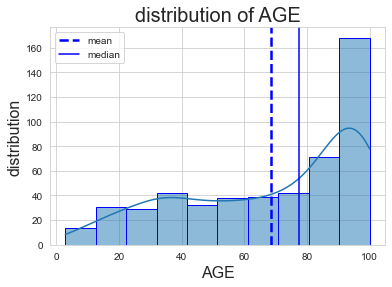

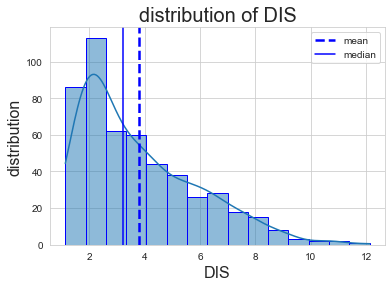

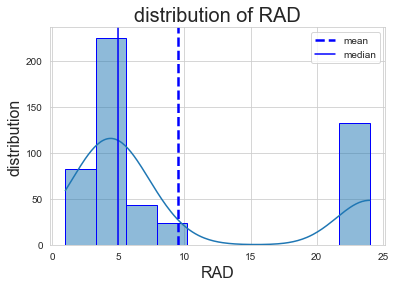

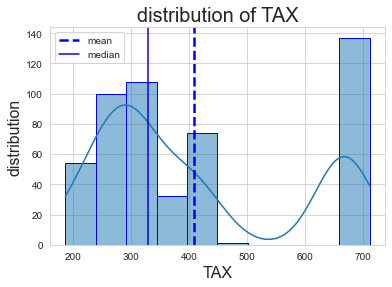

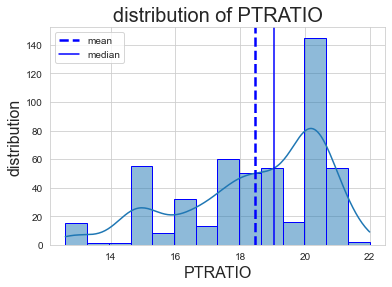

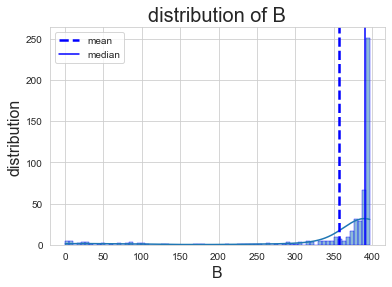

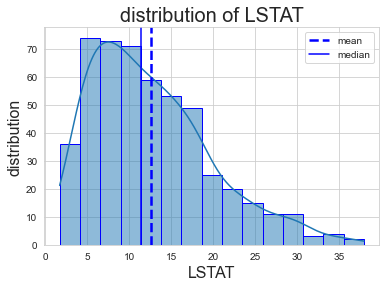

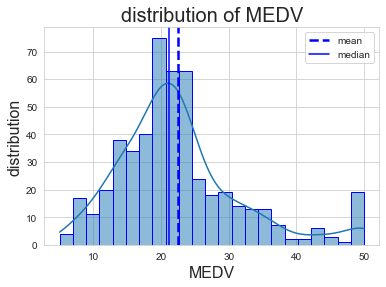

In [71]:
for i in numeric:                 # using for loop,to visualise data distribution and skeweness of all numeric columns together.
    fig,ax=plt.subplots(1,1)      # assigning veiw of the graphs on the notebook.
    sns.histplot(house[i],kde=True,edgecolor='blue') # plotting histogram.
    plt.title('distribution of %s'%(i),fontsize=20)  # giving title to each graph.
    plt.axvline(x=house[i].mean(),ls='--',lw=2.5,color='blue',label="mean")  # fixing 'mean' line and its characteristics.
    plt.axvline(x=house[i].median(),color='blue',label="median") # fixing 'median' line and its characteristics.
    plt.legend()   # showing legends in each graph.
    plt.xlabel(i,fontsize=16) # fixing x-axis name.
    plt.ylabel('distribution',fontsize=16) #fixing y-axis name.

##### Result:- Based on  all the above histograms,the skeweness of each numerical columns is verified, and also distribution of numerical columns is also visualised,and suitable actions are taken in below following steps.

### b) Distribution of categorical variables:-

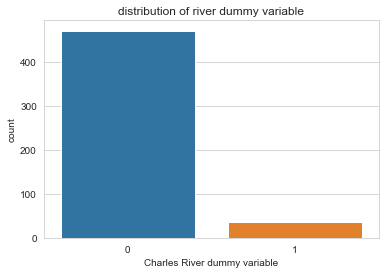

In [74]:
sns.set_style("whitegrid")
sns.countplot(x ='CHAS', data = house)
plt.xlabel('Charles River dummy variable')
plt.title('distribution of river dummy variable')
plt.show()

##### Result:- distribution of "charles river dummy variable" shows that most house plots are not river tract bound (i,e =0).

### log transformation of skewed  numerical variables :-

In [77]:
house['CRIM']=np.log(house.CRIM)  #using log transformation 
house['ZN']=np.log(house.ZN)      #using log transformation
house['NOX']=np.log(house.NOX)    #using log transformation
house['RM']=np.log(house.RM)      #using log transformation
house['DIS']=np.log(house.DIS)    #using log transformation
house['PTRATIO']=np.log(house.PTRATIO) #using log transformation
house['B']=np.log(house.B)         #using log transformation
house['LSTAT']=np.log(house.LSTAT) #using log transformation
house['MEDV']=np.log(house.MEDV)   #using log transformation

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


#### log transforming only the skewed variables.

Text(0.5, 1.0, 'CRIM after log transformation')

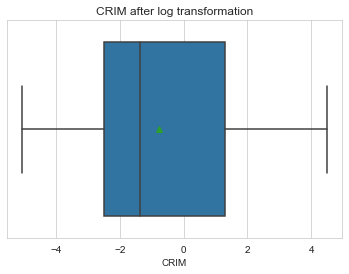

In [78]:
sns.boxplot(x='CRIM',data=house,showmeans=True)  # plotting boxplot using both mean and median
plt.title('CRIM after log transformation')       # displaying the graph

##### result:- CRIM now has no outliers.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


Text(0.5, 1.0, 'ZN after log transformation')

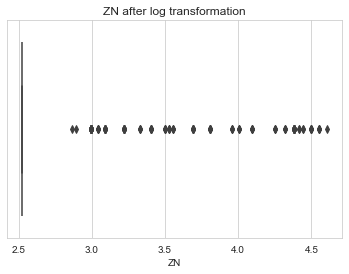

In [79]:
sns.boxplot(x='ZN',data=house,showmeans=True) # plotting boxplot using both mean and median
plt.title('ZN after log transformation')      # displaying the graph

##### Result:- ZN still has a lot of outliers.

Text(0.5, 1.0, 'NOX after log transformation')

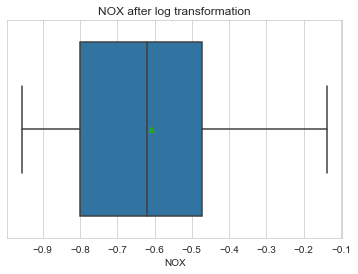

In [80]:
sns.boxplot(x='NOX',data=house,showmeans=True)  # plotting boxplot using both mean and median
plt.title('NOX after log transformation')       # displaying the graph

##### Result:- NOX has no outliers now.

Text(0.5, 1.0, 'RM after log transformation')

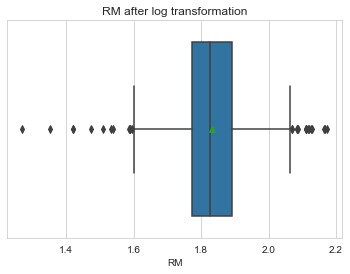

In [81]:
sns.boxplot(x='RM',data=house,showmeans=True) # plotting boxplot using both mean and median
plt.title('RM after log transformation')     # displaying the graph

##### Result:- RM still has outliers, but its mean and median have become almost same.

Text(0.5, 1.0, 'DIS after log transformation')

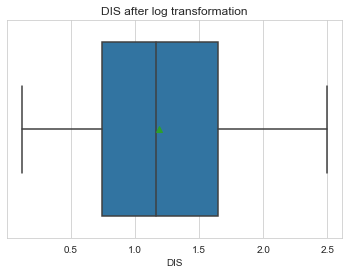

In [82]:
sns.boxplot(x='DIS',data=house,showmeans=True)  # plotting boxplot using both mean and median
plt.title('DIS after log transformation')       # displaying the graph

##### Result:- DIS has no outliers now.

Text(0.5, 1.0, 'PTRATIO after log transformation')

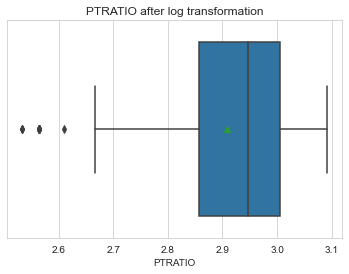

In [83]:
sns.boxplot(x='PTRATIO',data=house,showmeans=True)  # plotting boxplot using both mean and median
plt.title('PTRATIO after log transformation')       # displaying the graph

##### Result:- PTRATIO is left with 3 outliers.

Text(0.5, 1.0, 'B after log transformation')

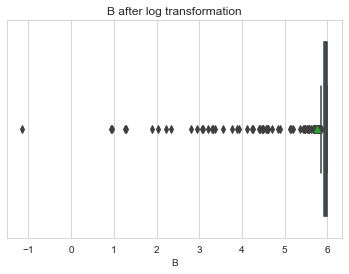

In [84]:
sns.boxplot(x='B',data=house,showmeans=True)  # plotting boxplot using both mean and median
plt.title('B after log transformation')       # displaying the graph

##### Result:- B still has a lot of outliers.

Text(0.5, 1.0, 'LSTAT after log transformation')

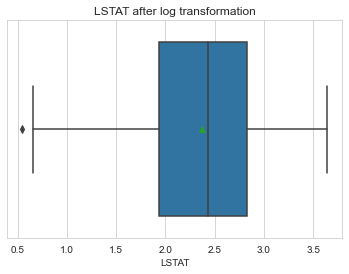

In [85]:
sns.boxplot(x='LSTAT',data=house,showmeans=True)  # plotting boxplot using both mean and median
plt.title('LSTAT after log transformation')       # displaying the graph

##### Result:- LSTAT is left with 1 outlier, and the mean and median value have become almost same.

Text(0.5, 1.0, 'MEDV after log transformation')

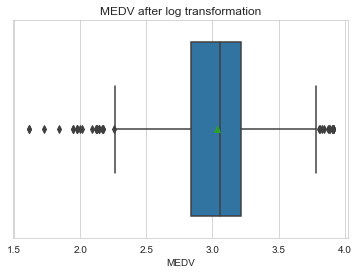

In [88]:
sns.boxplot(x='MEDV',data=house,showmeans=True)  # plotting boxplot using both mean and median
plt.title('MEDV after log transformation')      # displaying the graph

##### Result:- MEDV still has a lot of outliers.

### Result and reason to select transformation:-
##### 1) outliers are not removed since, here data is small, and removing outliers will also cause loss of data.
##### 2) therefore transformation is preferred.
##### 3) i choose log transformation since, square root transformation can't be used on highly skewed data,and box-cox can't be used on zero/negative values.
##### 4) even after log transforming the skewed variables, still some variables are having otliers,but there skweness is treated.

### Bivariate analysis:-

#### c) Numerical vs Categorical plots

<AxesSubplot:xlabel='CHAS', ylabel='RM'>

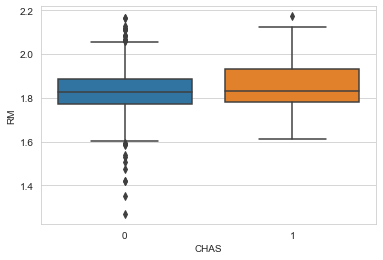

In [91]:
sns.boxplot(x='CHAS',y='RM',data=house) #plotting boxplot between 2 variables.

##### Result:- since the median line of both tract bound river(=1) and not tract not bound river(=0) are same, so its found that average number of rooms per dwelling is not affected by Charles River dummy variable.

<AxesSubplot:xlabel='CHAS', ylabel='NOX'>

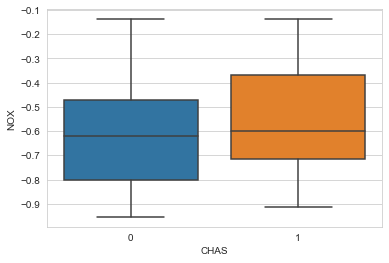

In [92]:
sns.boxplot(x='CHAS',y='NOX',data=house) #plotting boxplot between 2 variables.

##### Result:- since the median line of both tract bound river(=1) and not tract not bound river(=0) are almost same, so its found that nitric oxides concentration  is not affected by Charles River dummy variable.

<AxesSubplot:xlabel='CHAS', ylabel='PTRATIO'>

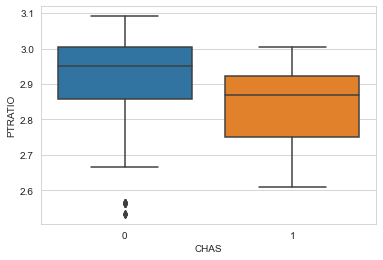

In [93]:
sns.boxplot(x='CHAS',y='PTRATIO',data=house) #plotting boxplot between 2 variables.

##### Result:- here it is found that,pupil-teacher ratio by town is higher in tracts which are not river bound(=0)

<AxesSubplot:xlabel='CHAS', ylabel='B'>

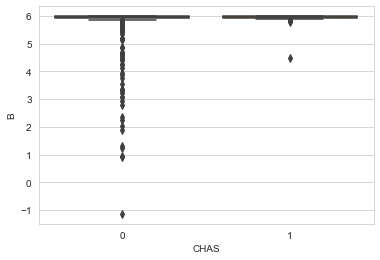

In [94]:
sns.boxplot(x='CHAS',y='B',data=house) #plotting boxplot between 2 variables.

##### Result:- no insights can be found between proportion of blacks in town v/s Charles River dummy variable.

<AxesSubplot:xlabel='CHAS', ylabel='INDUS'>

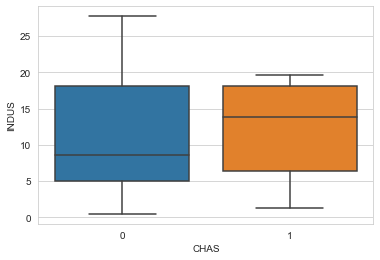

In [95]:
sns.boxplot(x='CHAS',y='INDUS',data=house) #plotting boxplot between 2 variables.

##### Result:- Here it is found that proportion of non-retail business acres per town is higher in houses tract bound rivers(=1).

<AxesSubplot:xlabel='CHAS', ylabel='CRIM'>

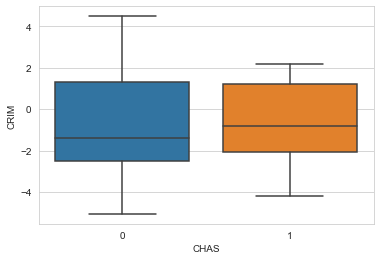

In [96]:
sns.boxplot(x='CHAS',y='CRIM',data=house) #plotting boxplot between 2 variables.

##### Result:- here it is found that crime rate is little higher in houses which are tract bound to river(=1).

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


<AxesSubplot:xlabel='CHAS', ylabel='ZN'>

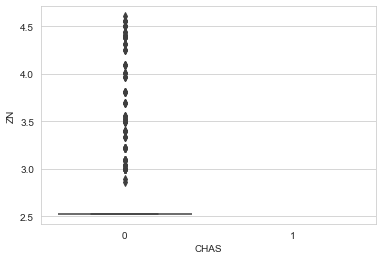

In [97]:
sns.boxplot(x='CHAS',y='ZN',data=house) #plotting boxplot between 2 variables.

##### Result:- no insights can be found.

<AxesSubplot:xlabel='CHAS', ylabel='AGE'>

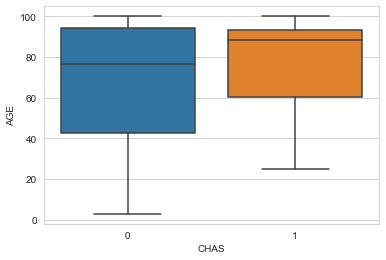

In [98]:
sns.boxplot(x='CHAS',y='AGE',data=house) #plotting boxplot between 2 variables.

##### Result:- here it is found that, proportion of owner-occupied units built prior to 1940 is higher for houses tract bound to river.

<AxesSubplot:xlabel='CHAS', ylabel='DIS'>

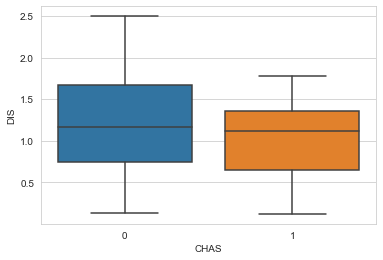

In [99]:
sns.boxplot(x='CHAS',y='DIS',data=house) #plotting boxplot between 2 variables.

##### Result:- here it is found that, weighted distances to five Boston employment centres is little more for houses not tract bound to river.

<AxesSubplot:xlabel='CHAS', ylabel='RAD'>

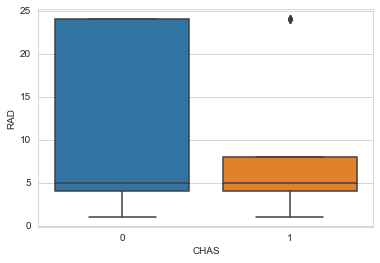

In [100]:
sns.boxplot(x='CHAS',y='RAD',data=house) #plotting boxplot between 2 variables.

##### Result:- here no proper insight can be found since median lines are same for both categories.

<AxesSubplot:xlabel='CHAS', ylabel='TAX'>

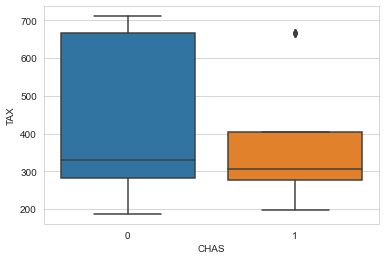

In [101]:
sns.boxplot(x='CHAS',y='TAX',data=house) #plotting boxplot between 2 variables.

##### Result:- here it is found that,full-value property-tax rate is slightly higher for houses which are not tract bound to rivers.

<AxesSubplot:xlabel='CHAS', ylabel='LSTAT'>

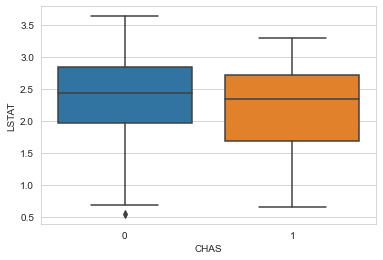

In [102]:
sns.boxplot(x='CHAS',y='LSTAT',data=house) #plotting boxplot between 2 variables.

##### Result:- here % lower status of the population is slightly higher for houses which are not tract bound to rivers.


<AxesSubplot:xlabel='CHAS', ylabel='MEDV'>

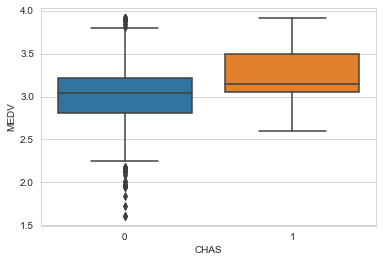

In [103]:
sns.boxplot(x='CHAS',y='MEDV',data=house) #plotting boxplot between 2 variables.

##### Result:- here Median value of owner-occupied homes is higher for houses which are tract bound to rivers.

#### d) Numerical vs Numerical plots

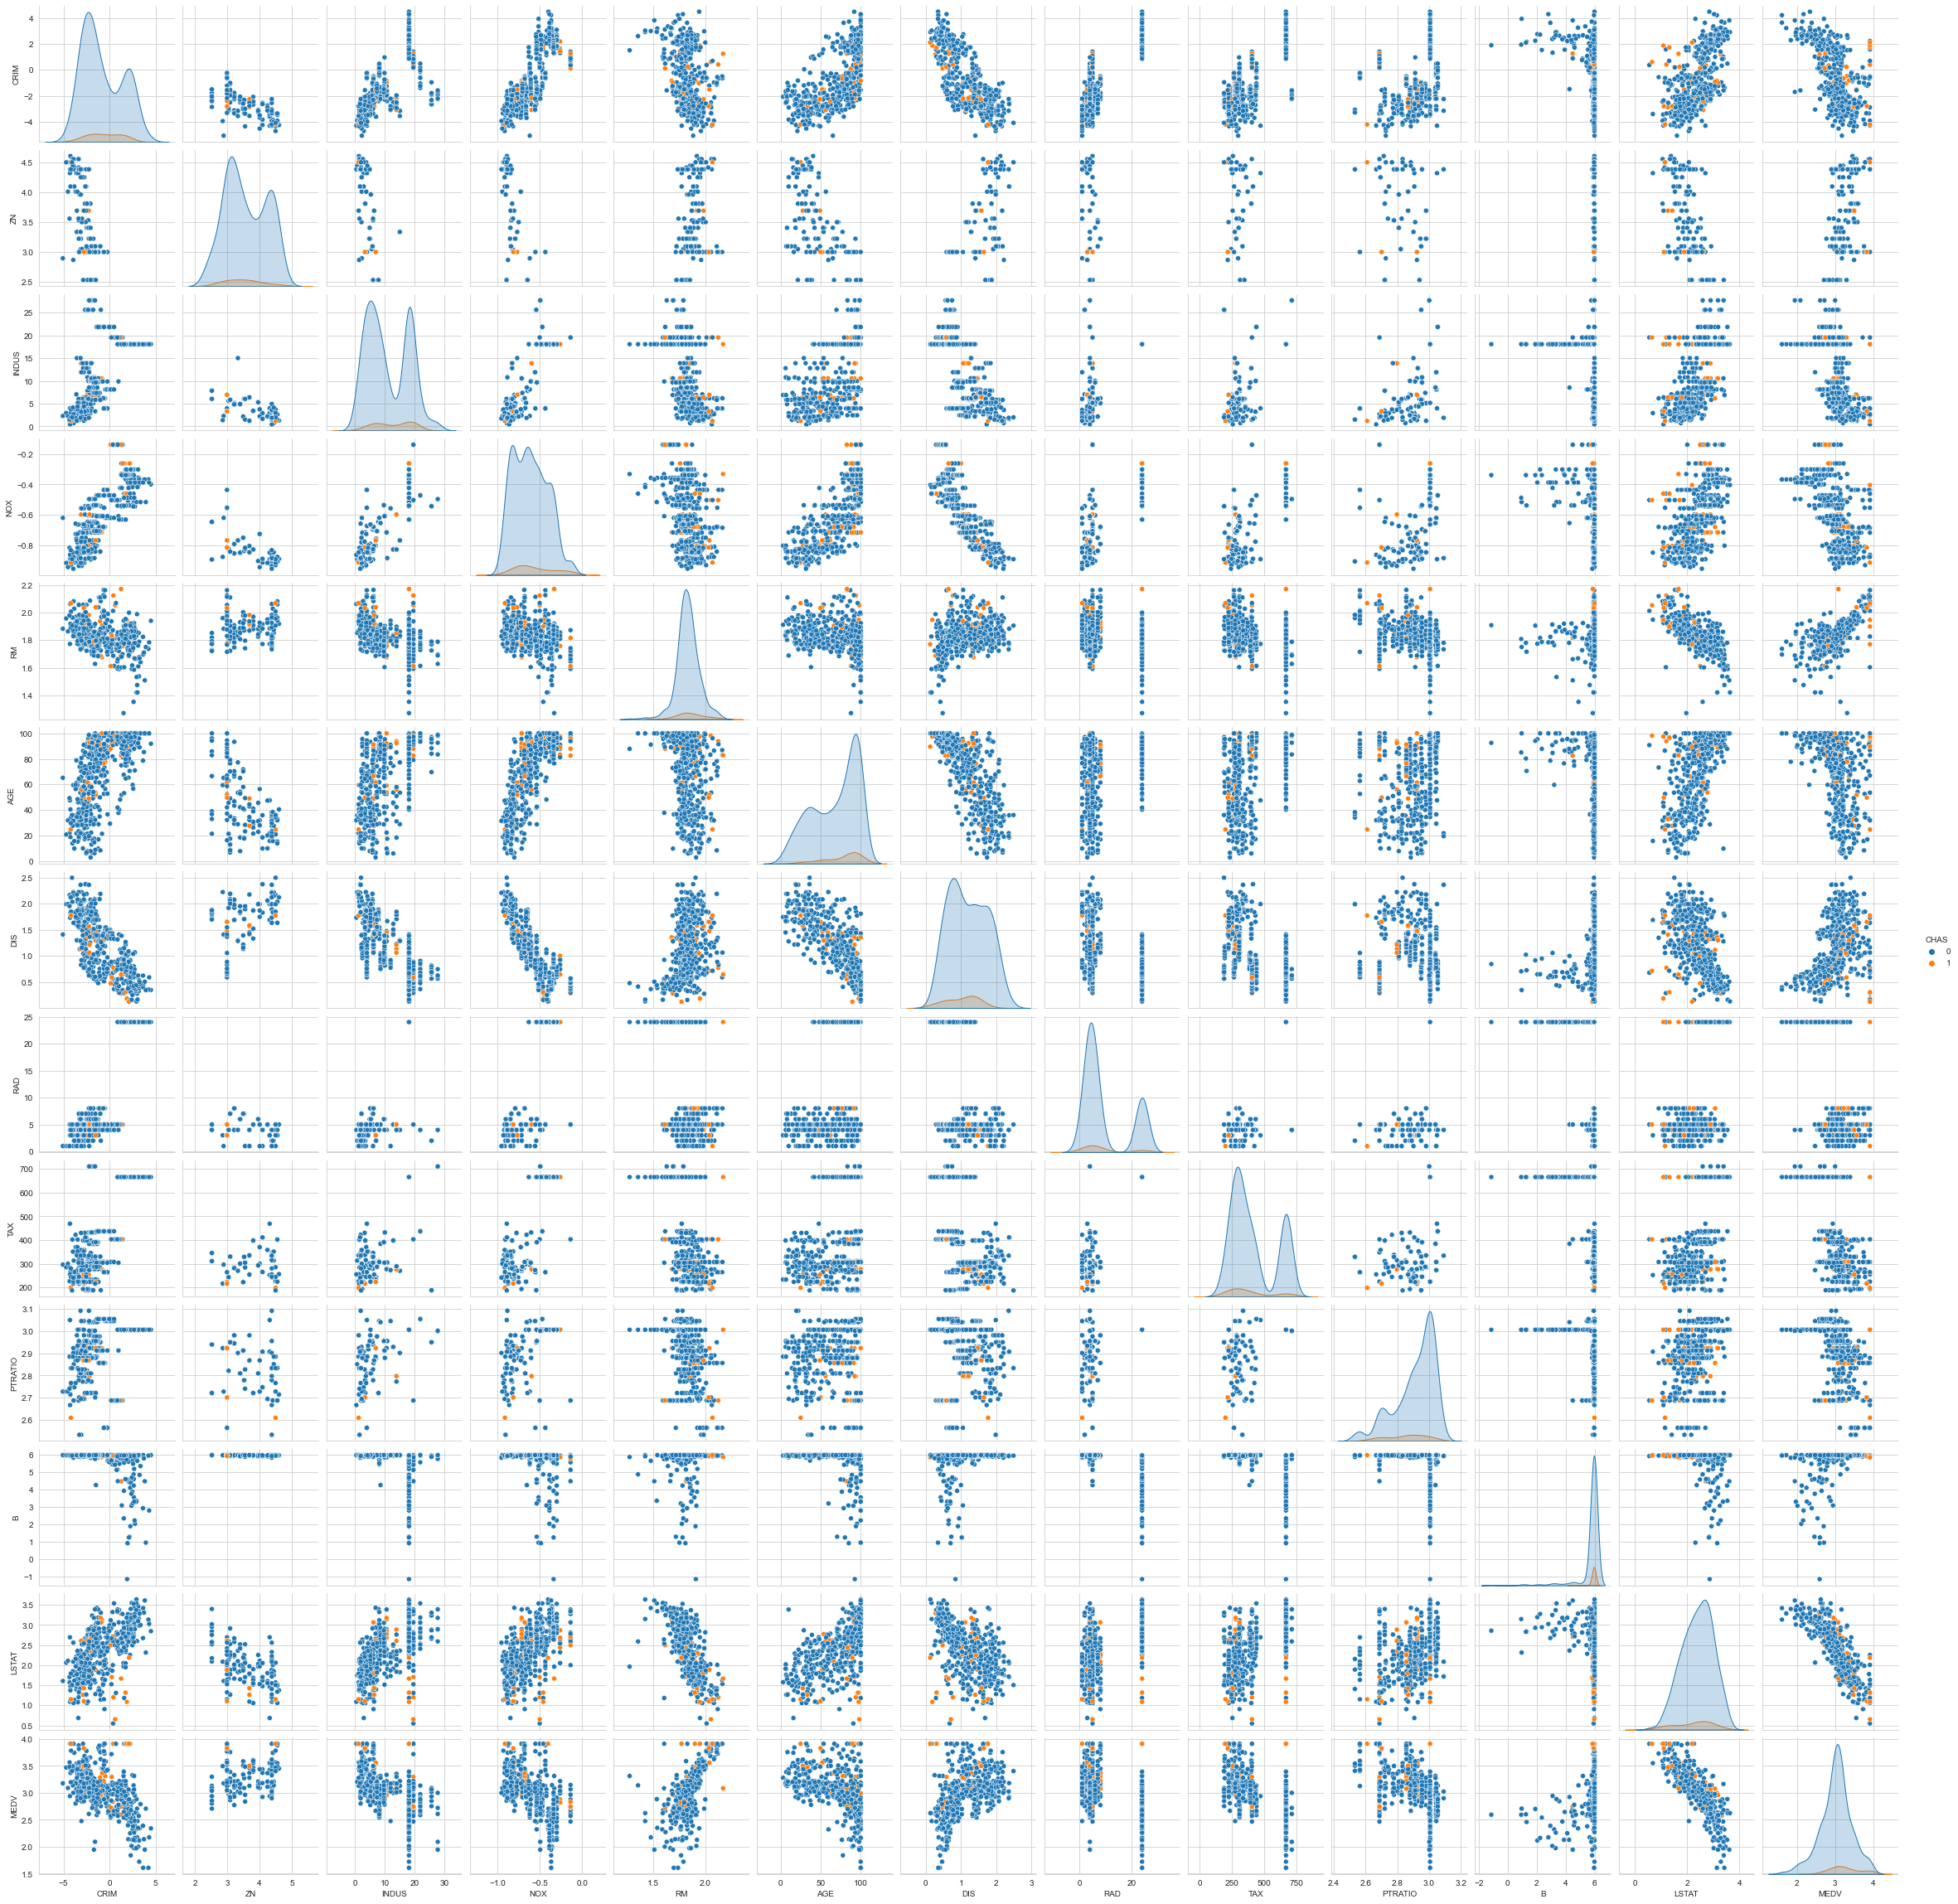

In [108]:
sns.pairplot(house, hue ='CHAS')
plt.show()

##### Result:- no definite insights arrived from pairplot.

Text(0.5, 1.0, 'relationship between NOX & RM')

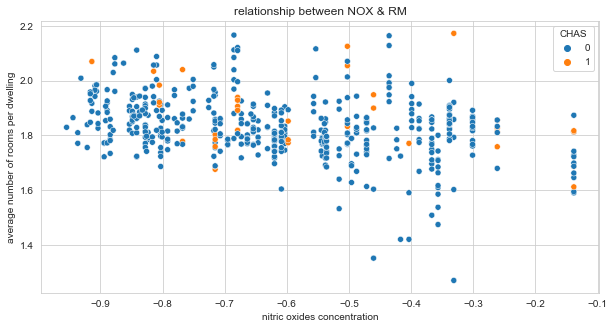

In [109]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="NOX",y="RM",hue="CHAS",data=house)
plt.xlabel("nitric oxides concentration")
plt.ylabel("average number of rooms per dwelling")
plt.title("relationship between NOX & RM")

##### Result:- there is no linear relationship between NOX and RM

Text(0.5, 1.0, 'relationship between DIS & RAD')

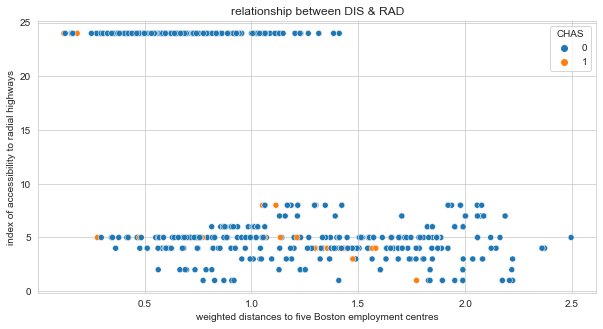

In [110]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="DIS",y="RAD",hue="CHAS",data=house)
plt.xlabel("weighted distances to five Boston employment centres")
plt.ylabel("index of accessibility to radial highways")
plt.title("relationship between DIS & RAD")

##### Result:- there is no linear relationship between DIS and RAD.

Text(0.5, 1.0, 'relationship between CRIM & PTRATIO')

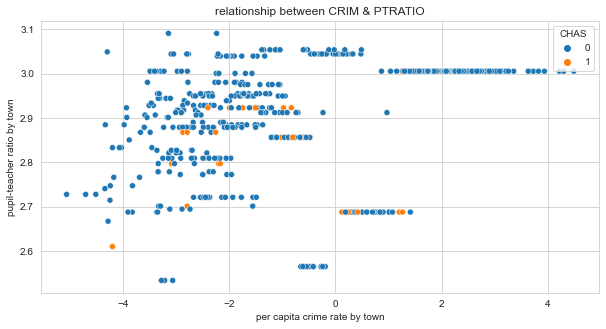

In [112]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="CRIM",y="PTRATIO",hue="CHAS",data=house)
plt.xlabel("per capita crime rate by town")
plt.ylabel("pupil-teacher ratio by town")
plt.title("relationship between CRIM & PTRATIO")

##### Result:- there is a linear relationship between CRIM and PTRATIO.

Text(0.5, 1.0, 'relationship between CRIM & B')

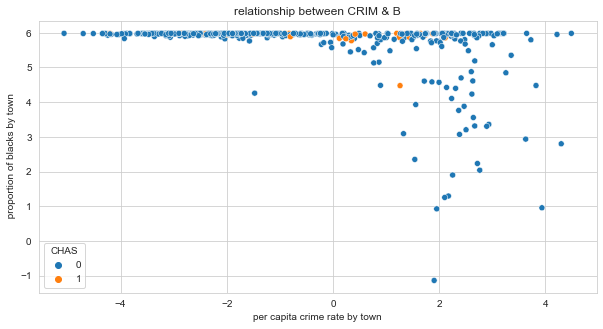

In [113]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="CRIM",y="B",hue="CHAS",data=house)
plt.xlabel("per capita crime rate by town")
plt.ylabel(" proportion of blacks by town")
plt.title("relationship between CRIM & B")

##### Result:- there is  no clear linear relationship between CRIM and B( black population in town).

### Multivariate analysis:-

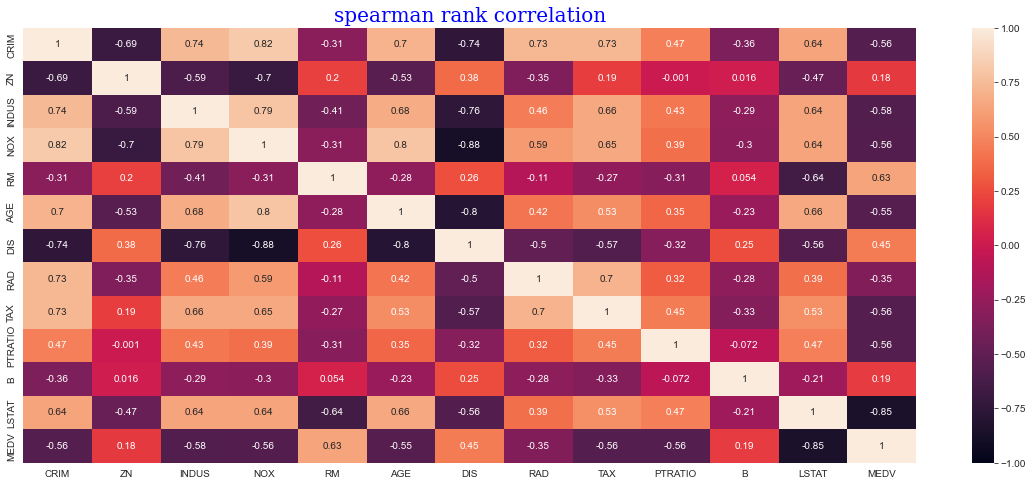

In [115]:
# spearman-rank correlation heatmap

house.corr(method='spearman')                    #selecting method as spearman
plt.figure(figsize=(20,8))                       # fixing figure size
heatmap= sns.heatmap(house.corr(method='spearman').round(3),vmin=-1,
                     vmax=1,annot=True)          #plotting heatmap,"annot=true" means writting value in each cell

font1={'family':'serif','color':'blue','size':20} #fixing font size of heat map
plt.title('spearman rank correlation',font1)      # fixing title to the heatmap
plt.show()                                        # display heatmap


### Result:- summarised results are in table below.

#### Table 3:- 

|variables | related to | type of correlation | value |
|:------ |:------ |:------ |:------ |
| CRIM | NOX | strong positive | 0.82 |
| NOX | DIS | strong negative | -0.88 |
| AGE | NOX | strong positive | 0.8 |
| AGE | DIS | strong negative | -0.8 |
| LSTAT | MEDV | strong negative | -0.85 |

#### note:- ( correlation value greater than +/- 0.8 is taken as strong positive/negative correlated).

### Final conclusion:- Based on Exploratory data analysis done, 4 variables are found suitable to be used for machine learning model.but refering the research papers, and other related research,it is found that data collection methods were biased, hence it will effect the final model as well.